In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadr

data = pyreadr.read_r ("births2006.smpl.rda")
print (data.keys())

df = data['births2006.smpl']


'Task-1 : The first five records of the dataset'

df.head(5)


odict_keys(['births2006.idx', 'births2006.smpl'])


,DOB_MM,DOB_WK,MAGER,TBO_REC,WTGAIN,SEX,APGAR5,DMEDUC,UPREVIS,ESTGEST,DMETH_REC,DPLURAL,DBWT
0,9,1,25,2,NaN,F,NaN,NULL,10,99,Vaginal,1 Single,3800
1,2,6,28,2,26,M,9,2 years of college,10,37,Vaginal,1 Single,3625
2,2,2,18,2,25,F,9,NULL,14,38,Vaginal,1 Single,3650
3,10,5,21,2,6,M,9,NULL,22,38,Vaginal,1 Single,3045
4,7,7,25,1,36,M,10,2 years of high school,15,40,Vaginal,1 Single,3827


In [7]:
df.isnull().sum()

DOB_MM           0
DOB_WK           0
MAGER            0
TBO_REC       3134
WTGAIN       75856
SEX              0
APGAR5       58231
DMEDUC           0
UPREVIS          0
ESTGEST          0
DMETH_REC        0
DPLURAL          0
DBWT           434
dtype: int64

In [3]:
print (df.columns)

Index(['DOB_MM', 'DOB_WK', 'MAGER', 'TBO_REC', 'WTGAIN', 'SEX', 'APGAR5',
       'DMEDUC', 'UPREVIS', 'ESTGEST', 'DMETH_REC', 'DPLURAL', 'DBWT'],
      dtype='object')


In [6]:
dob_wk = df['DOB_WK']
dob_wk

0         1
1         6
2         2
3         5
4         7
         ..
427318    4
427319    3
427320    2
427321    5
427322    2
Name: DOB_WK, Length: 427323, dtype: int32

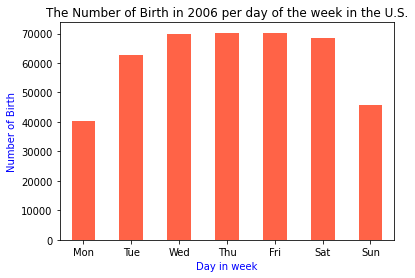

In [46]:
'Task-2 : The Number of Birth in 2006 per day of the week in the U.S.'

dob_wk = df.groupby("DOB_WK").size()

label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

dob_wk.plot(kind = "bar", color = "tomato")

plt.title("The Number of Birth in 2006 per day of the week in the U.S.")
plt.xlabel("Day in week", color = "blue")
plt.ylabel("Number of Birth", color = "blue")
plt.xticks(np.arange(len(label)), label, rotation = 0)
plt.show()


In [39]:
dmeth_rec = df.groupby(["DMETH_REC","DOB_WK"])
dmeth_rec.first()

DOB_MM  MAGER  TBO_REC  WTGAIN SEX  APGAR5  \
DMETH_REC DOB_WK                                               
C-section 1           11     34        2      30   F       9   
          2            5     33        2      26   M       9   
          3           10     18        1      46   F       9   
          4            8     37        2      35   M       9   
          5            3     31        8      79   M       9   
          6            7     27        2      50   F       9   
          7            4     31        3      25   F       9   
Unknown   1            1     25        1      25   M       8   
          2           11     35        6      12   F       9   
          3            4     38        2       8   F       9   
          4            8     29        1      23   F       9   
          5            6     29        1      24   F       9   
          6            3     31        1       7   M       9   
          7            7     18        1      40   F       9   
Vaginal   1            9     25        2      30   F       9   
          2            2     18        2      25   F       9   
          3            3     28        3      35   M       8   
          4            4     24        2      43   M       9   
          5           10     21        2       6   M       9   
          6            2     28        2      26   M       9   
          7            7     25        1      36   M      10   

                                  DMEDUC  UPREVIS  ESTGEST   DPLURAL  DBWT  
DMETH_REC DOB_WK                                                            
C-section 1           3 years of college       13       39  1 Single  2750  
          2                         NULL       10       38  1 Single  3430  
          3                         NULL       15       40  1 Single  3227  
          4                         NULL       15       99  1 Single  3685  
          5                         NULL       28       38    2 Twin  2892  
          6                         NULL       12       36    2 Twin  2445  
          7           2 years of college       19       38  1 Single  3204  
Unknown   1       4 years of high school       13       38  1 Single  3402  
          2       4 years of high school        9       38  1 Single  3639  
          3           3 years of college       10       39  1 Single  2855  
          4       3 years of high school       10       39  1 Single  3827  
          5                         NULL       13       40  1 Single  2670  
          6           3 years of college       14       37  1 Single  3570  
          7                         NULL       12       40  1 Single  3447  
Vaginal   1                         NULL       10       99  1 Single  3800  
          2                         NULL       14       38  1 Single  3650  
          3                         NULL       18       39  1 Single  3090  
          4       2 years of high school       13       40  1 Single  3459  
          5                         NULL       22       38  1 Single  3045  
          6           2 years of college       10       37  1 Single  3625  
          7       2 years of high school       15       40  1 Single  3827

([<matplotlib.axis.XTick at 0x7f5ba858be80>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thu'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

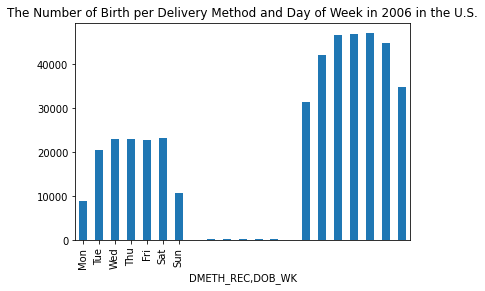

In [40]:
'Task-3: The Number of Birth per Delivery Method and Day of Week in 2006 in the U.S.'
dmeth_rec = df.groupby(["DMETH_REC","DOB_WK"]).size()
label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
